In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import string 
import re
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet', '/root/nltk_data/')
!unzip /root/nltk_data/corpora/wordnet.zip -d /root/nltk_data/corpora/
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data/...
[nltk_data]   Package wordnet is already up-to-date!
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
df = pd.read_csv('Depression_in_Tweets.csv')

In [3]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [4]:
df.tail()

,Index,message to examine,label (depression result)
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1
10313,802313,0,1


In [5]:
df.describe()

,Index,label (depression result)
count,10314.000000,10314.000000
mean,491253.470525,0.224355
std,261688.134407,0.417177
min,106.000000,0.000000
25%,263019.250000,0.000000
50%,514988.000000,0.000000
75%,773521.500000,0.000000
max,802313.000000,1.000000


In [6]:
#The rows and columns of the dataset
df.shape

(10314, 3)

In [7]:
#No null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [8]:
#Let's double check for nulls - no nulls
df.isnull().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

In [9]:
df.count()

Index                        10314
message to examine           10314
label (depression result)    10314
dtype: int64

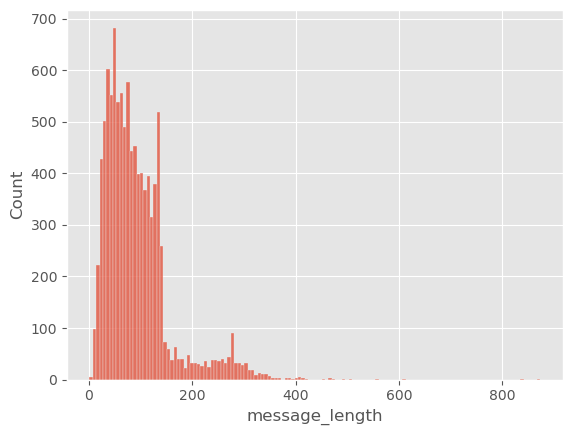

In [10]:
# Create a new column for message length
df['message_length'] = df['message to examine'].apply(len)

# Visualize the distribution of message lengths
sns.histplot(df['message_length'])
plt.show()

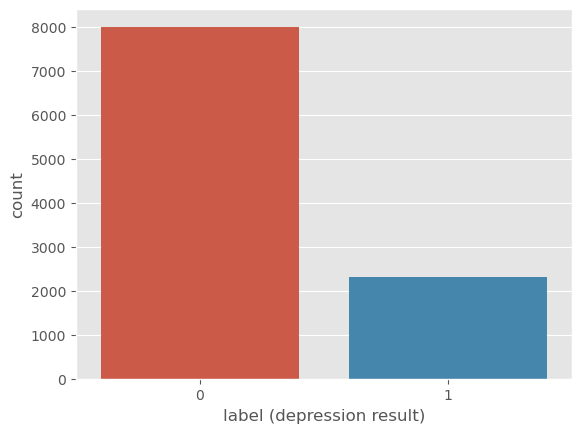

In [11]:
# Visualize the distribution of labels
sns.countplot(x='label (depression result)', data=df)
plt.show()


In [12]:
!pip install wordcloud

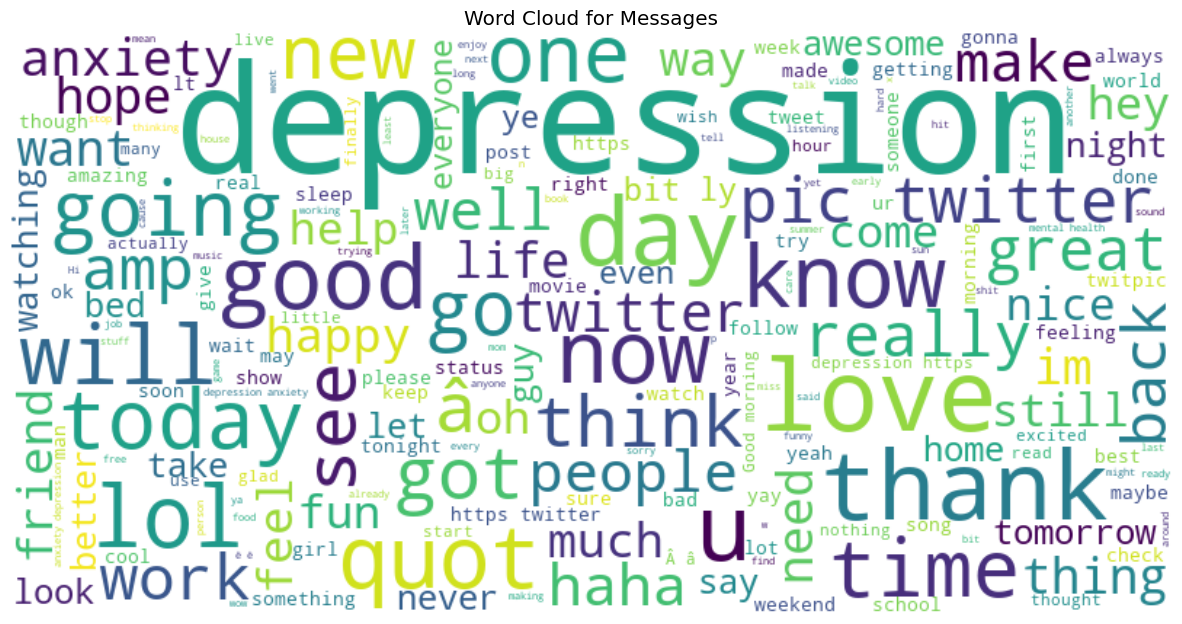

In [13]:
from wordcloud import WordCloud

# Create a word cloud for messages
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['message to examine']))

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Messages')
plt.show()


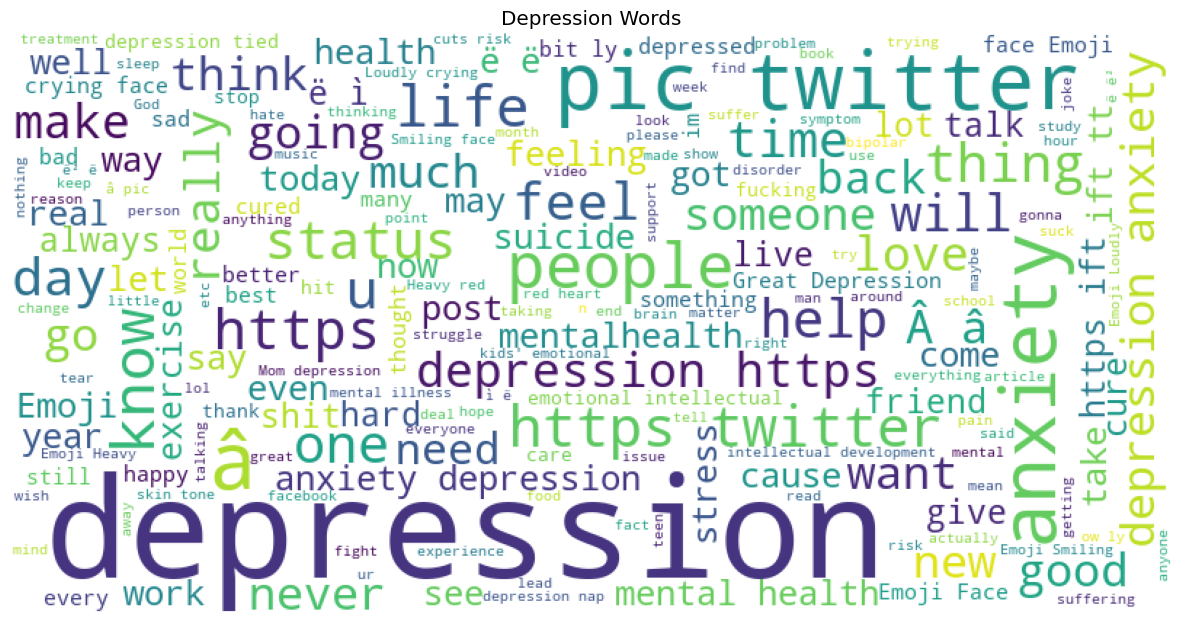

In [14]:
# Depression Words

plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',
                      width=800,
                      height=400
                     ).generate(" ".join(df[df['label (depression result)'] == 1]['message to examine']))

plt.imshow(wordcloud)
plt.axis('off')
plt.title('Depression Words')
plt.show()

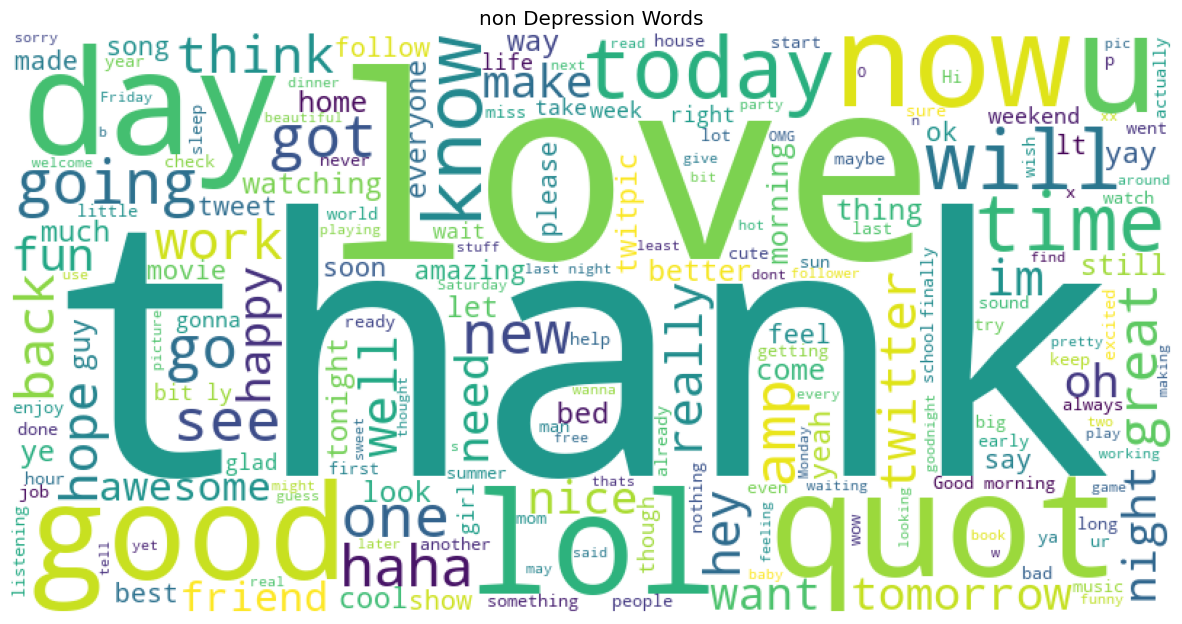

In [15]:
# non Depression Words

plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',
                      width=800,
                      height=400
                     ).generate(" ".join(df[df['label (depression result)'] == 0]['message to examine']))

plt.imshow(wordcloud)
plt.axis('off')
plt.title('non Depression Words')
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_17156\1694386574.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


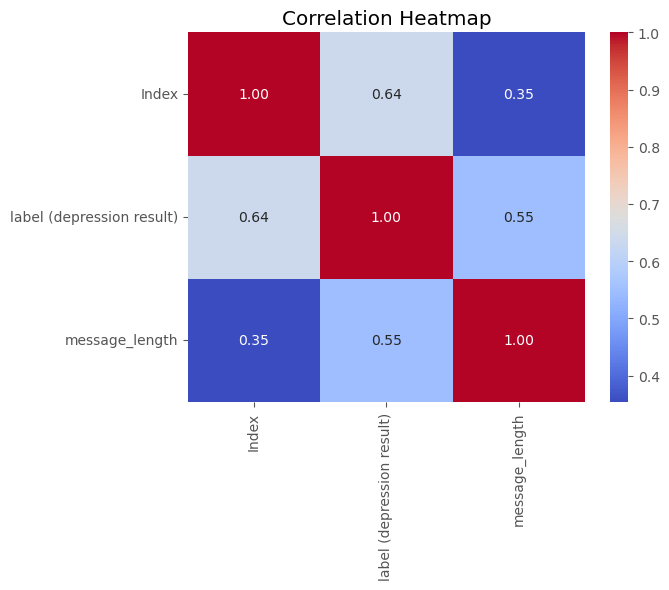

In [16]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


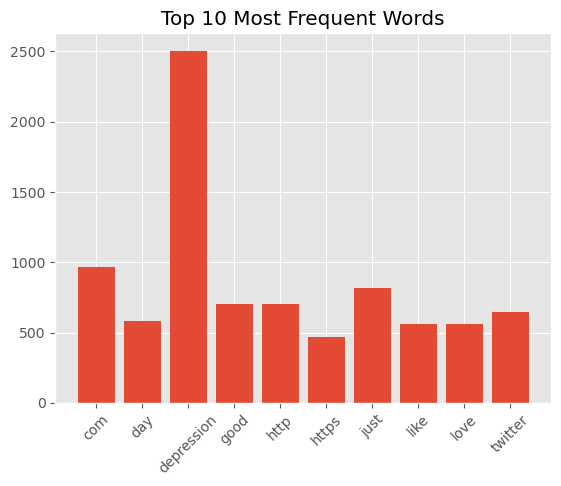

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=10)
word_freq = vectorizer.fit_transform(df['message to examine'])
words = vectorizer.get_feature_names_out()

plt.bar(words, word_freq.sum(axis=0).A1)
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()


In [18]:
#since http and https are among the most frequent word, let's remove them
def remove_urls(text):
    url_pattern = re.compile(r'(https?://\S+)|(www\.\S+)|(\S+\.\S+/\S+)')
    return url_pattern.sub(r'', text)

df['Removed_Urls'] = df['message to examine'].apply(remove_urls)

df.head()


,Index,message to examine,label (depression result),message_length,Removed_Urls
0,106,just had a real good moment. i missssssssss hi...,0,57,just had a real good moment. i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,42,is reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,84,@comeagainjen -
3,288,@lapcat Need to send 'em to my accountant tomo...,0,135,@lapcat Need to send 'em to my accountant tomo...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,45,ADD ME ON MYSPACE!!!


In [19]:
def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"
        "\U0001F1E0-\U0001F1FF"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )

    return emoji_pattern.sub(r"", text)


df["Remove_emoji"] = df["Removed_Urls"].apply(remove_emoji)


import re

# match all non-alphanumeric and non-whitespace characters,
pattern = r"[^\w\s]"


df["punkt"] = df["Remove_emoji"].apply(lambda x: re.sub(pattern, " ", x))


In [20]:
df

,Index,message to examine,label (depression result),message_length,Removed_Urls,Remove_emoji,punkt
0,106,just had a real good moment. i missssssssss hi...,0,57,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,42,is reading manga,is reading manga,is reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,84,@comeagainjen -,@comeagainjen -,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,135,@lapcat Need to send 'em to my accountant tomo...,@lapcat Need to send 'em to my accountant tomo...,lapcat Need to send em to my accountant tomo...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,45,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE
...,...,...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,101,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...
10310,802310,What do you do when depression succumbs the br...,1,97,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,96,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...
10312,802312,dont mistake a bad day with depression! everyo...,1,57,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression everyo...


In [21]:

# Create a set of English stopwords
STOPWORDS = set(stopwords.words('english'))

# Function to remove the stopwords
def remove_stopwords(text):
    """
    Remove stopwords from the input text
    
    Args:
    text (str): Input text
    
    Returns:
    str: Text with stopwords removed
    """
    return " ".join([word for word in text.split() if word not in STOPWORDS])

# Apply the remove_stopwords function to the 'punkt' column in the dataframe
df['stopWord_Removed'] = df['punkt'].apply(remove_stopwords)

# Display the updated dataframe
df


,Index,message to examine,label (depression result),message_length,Removed_Urls,Remove_emoji,punkt,stopWord_Removed
0,106,just had a real good moment. i missssssssss hi...,0,57,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss hi...,real good moment missssssssss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,42,is reading manga,is reading manga,is reading manga,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,84,@comeagainjen -,@comeagainjen -,comeagainjen,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,135,@lapcat Need to send 'em to my accountant tomo...,@lapcat Need to send 'em to my accountant tomo...,lapcat Need to send em to my accountant tomo...,lapcat Need send em accountant tomorrow Oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,45,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE,ADD ME ON MYSPACE
...,...,...,...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,101,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...,No Depression G Herbo mood done stressing peop...
10310,802310,What do you do when depression succumbs the br...,1,97,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...,What depression succumbs brain makes feel like...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,96,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...
10312,802312,dont mistake a bad day with depression! everyo...,1,57,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression everyo...,dont mistake bad day depression everyone em


In [22]:

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function to perform stemming and lemmatization
def preprocess_text(text):
    stemmed_text = ' '.join([stemmer.stem(word) for word in text.split()])
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return stemmed_text, lemmatized_text

In [23]:
nltk.download('wordnet')
# Apply preprocessing to the text column
df['stemmed_message'], df['lemmatized_message'] = zip(*df['message to examine'].apply(preprocess_text))

# Create bag of words using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['lemmatized_message'])
X = pd.DataFrame(X.toarray())
X.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,0,1,2,3,4,5,6,7,8,9,...,22240,22241,22242,22243,22244,22245,22246,22247,22248,22249
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['label (depression result)'], test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)



MultinomialNB()

In [25]:
# Make predictions and evaluate accuracy
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9689772176442074


In [26]:
from sklearn import metrics 

cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matix:')
print(cm, '\n\n')
print ('--------------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

Confusion Matix:
[[1564   50]
 [  14  435]] 


--------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1614
           1       0.90      0.97      0.93       449

    accuracy                           0.97      2063
   macro avg       0.94      0.97      0.96      2063
weighted avg       0.97      0.97      0.97      2063



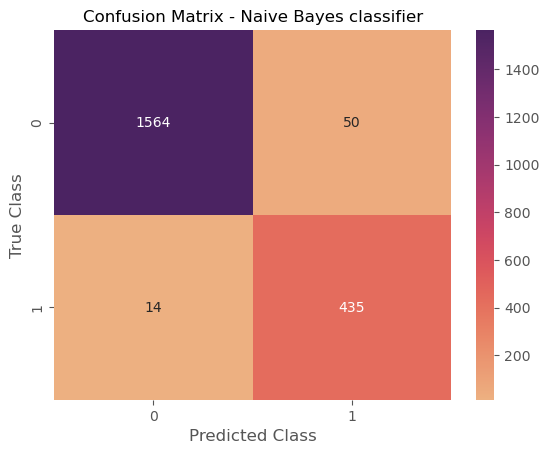

In [27]:
#use the seaborn heatmap to visualise the confusion matrix
ax = sns.heatmap(cm, cmap = 'flare', annot = True, fmt ='d')

plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix - Naive Bayes classifier", fontsize=12)

plt.show()

In [28]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download necessary NLTK resources
nltk.download('vader_lexicon')
nltk.download('omw-1.4')

# Assuming df is your DataFrame with a 'text' column
sentiment = SentimentIntensityAnalyzer()

# Apply sentiment analysis and create new columns
df['compound'] = [sentiment.polarity_scores(text)['compound'] for text in df['stopWord_Removed']]
df['neg'] = [sentiment.polarity_scores(text)['neg'] for text in df['stopWord_Removed']]
df['neu'] = [sentiment.polarity_scores(text)['neu'] for text in df['stopWord_Removed']]
df['pos'] = [sentiment.polarity_scores(text)['pos'] for text in df['stopWord_Removed']]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [29]:
df[['compound', 'neg', 'neu', 'pos' ]].describe()

,compound,neg,neu,pos
count,10314.000000,10314.000000,10314.000000,10314.000000
mean,0.157569,0.127963,0.612016,0.259826
std,0.510497,0.198841,0.253121,0.240694
min,-0.991900,0.000000,0.000000,0.000000
25%,-0.077200,0.000000,0.421000,0.000000
50%,0.177900,0.000000,0.580000,0.242000
75%,0.585900,0.235000,0.785750,0.438000
max,0.980800,1.000000,1.000000,1.000000


In [30]:
df.head()

,Index,message to examine,label (depression result),message_length,Removed_Urls,Remove_emoji,punkt,stopWord_Removed,stemmed_message,lemmatized_message,compound,neg,neu,pos
0,106,just had a real good moment. i missssssssss hi...,0,57,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss hi...,real good moment missssssssss much,just had a real good moment. i missssssssss hi...,"just had a real good moment. i miss him so much,",0.4404,0.0,0.580,0.420
1,217,is reading manga http://plurk.com/p/mzp1e,0,42,is reading manga,is reading manga,is reading manga,reading manga,is read manga http://plurk.com/p/mzp1,is reading manga http://plurk.com/p/mzp1e,0.0000,0.0,1.000,0.000
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,84,@comeagainjen -,@comeagainjen -,comeagainjen,comeagainjen,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen http://twitpic.com/2y2lx - http:...,0.0000,0.0,1.000,0.000
3,288,@lapcat Need to send 'em to my accountant tomo...,0,135,@lapcat Need to send 'em to my accountant tomo...,@lapcat Need to send 'em to my accountant tomo...,lapcat Need to send em to my accountant tomo...,lapcat Need send em accountant tomorrow Oddly ...,@lapcat need to send 'em to my account tomorro...,@lapcat Need to send 'em to my accountant tomo...,0.4404,0.0,0.818,0.182
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,45,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE,ADD ME ON MYSPACE,add me on myspace!!! myspace.com/lookthund,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0.0000,0.0,1.000,0.000


<Axes: xlabel='compound', ylabel='Count'>

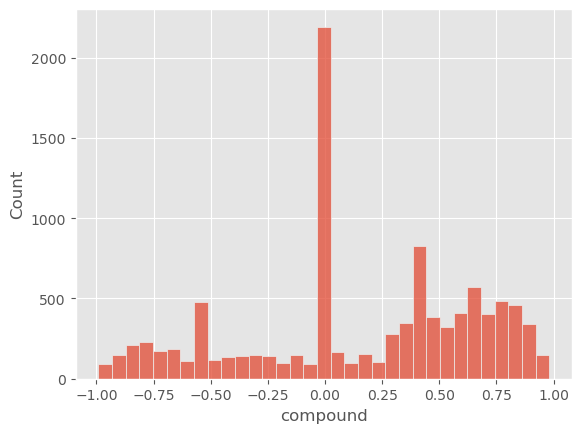

In [31]:
sns.histplot(df['compound'])

<Axes: xlabel='pos', ylabel='Count'>

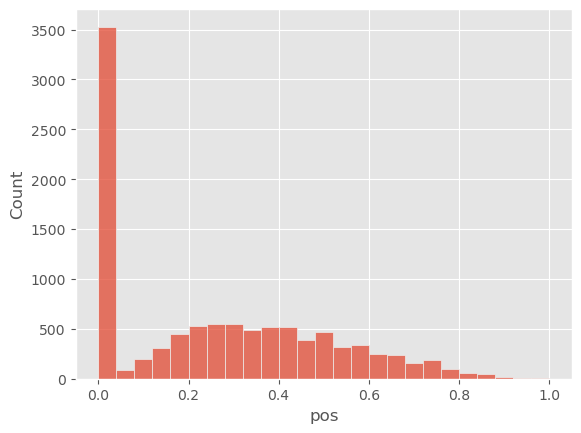

In [32]:
sns.histplot(df['pos'])

<Axes: xlabel='neg', ylabel='Count'>

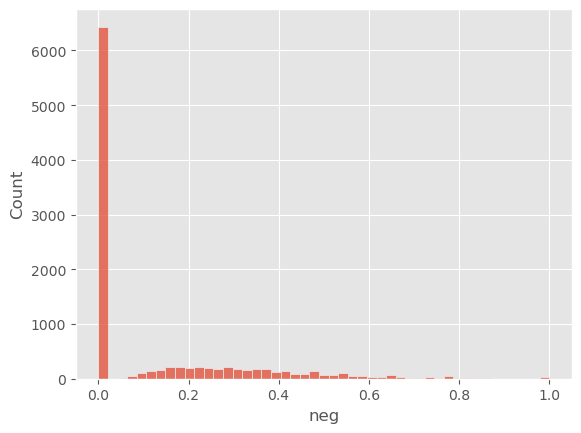

In [33]:
sns.histplot(df['neg'])

<Axes: xlabel='neu', ylabel='Count'>

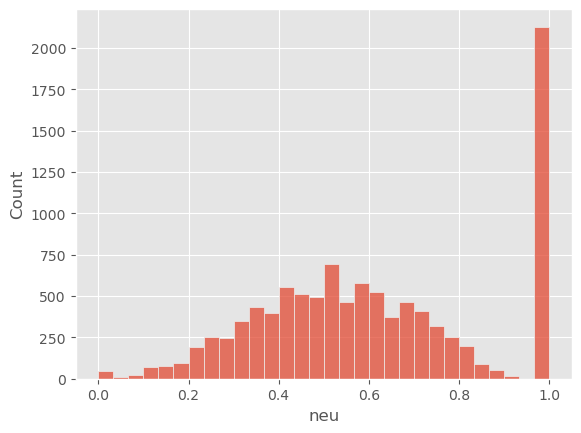

In [42]:
sns.histplot(df['neu'])

In [34]:
(df['compound']<=0).groupby(df['Index']).sum()

Index
106       0
217       1
220       1
288       0
540       1
         ..
802309    1
802310    1
802311    1
802312    0
802313    1
Name: compound, Length: 10314, dtype: int64

In [35]:
Percentage_negative = pd.DataFrame((df["label (depression result)"] == 0).groupby(df['Index']).sum()
                                   / df['Index'].groupby(df['Index']).count() * 100,
                                   columns=['% negative tweets']).sort_values(by='% negative tweets')

Percentage_negative


,% negative tweets
Index,
802313,0.0
800773,0.0
800772,0.0
800771,0.0
800770,0.0
...,...
350185,100.0
350307,100.0
350344,100.0


<Axes: xlabel='% negative tweets', ylabel='Index'>

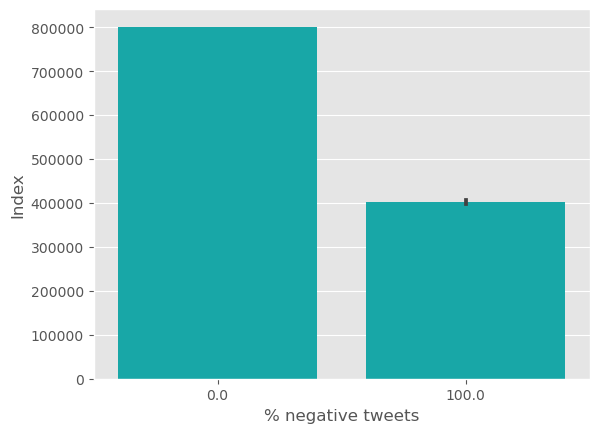

In [36]:
sns.barplot(data=Percentage_negative, x = '% negative tweets', y = Percentage_negative.index, color='c')

In [37]:
df['processed_tweets'] = df['stopWord_Removed'].apply(preprocess_text)

positive_tweets_subset = df.loc[df["label (depression result)"]== 0]
negative_tweets_subset = df.loc[df["label (depression result)"]== 1]

positive_tweets_subset

,Index,message to examine,label (depression result),message_length,Removed_Urls,Remove_emoji,punkt,stopWord_Removed,stemmed_message,lemmatized_message,compound,neg,neu,pos,processed_tweets
0,106,just had a real good moment. i missssssssss hi...,0,57,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss hi...,real good moment missssssssss much,just had a real good moment. i missssssssss hi...,"just had a real good moment. i miss him so much,",0.4404,0.0,0.580,0.420,"(real good moment missssssssss much, real good..."
1,217,is reading manga http://plurk.com/p/mzp1e,0,42,is reading manga,is reading manga,is reading manga,reading manga,is read manga http://plurk.com/p/mzp1,is reading manga http://plurk.com/p/mzp1e,0.0000,0.0,1.000,0.000,"(read manga, reading manga)"
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,84,@comeagainjen -,@comeagainjen -,comeagainjen,comeagainjen,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen http://twitpic.com/2y2lx - http:...,0.0000,0.0,1.000,0.000,"(comeagainjen, comeagainjen)"
3,288,@lapcat Need to send 'em to my accountant tomo...,0,135,@lapcat Need to send 'em to my accountant tomo...,@lapcat Need to send 'em to my accountant tomo...,lapcat Need to send em to my accountant tomo...,lapcat Need send em accountant tomorrow Oddly ...,@lapcat need to send 'em to my account tomorro...,@lapcat Need to send 'em to my accountant tomo...,0.4404,0.0,0.818,0.182,(lapcat need send em account tomorrow oddli i ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,45,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE,ADD ME ON MYSPACE,add me on myspace!!! myspace.com/lookthund,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0.0000,0.0,1.000,0.000,"(add me on myspac, ADD ME ON MYSPACE)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,799410,"&quot;Wow, What A Tight Fit&quot; Lmao, Shutup.",0,48,"&quot;Wow, What A Tight Fit&quot; Lmao, Shutup.","&quot;Wow, What A Tight Fit&quot; Lmao, Shutup.",quot Wow What A Tight Fit quot Lmao Shutup,quot Wow What A Tight Fit quot Lmao Shutup,"&quot;wow, what a tight fit&quot; lmao, shutup.","&quot;Wow, What A Tight Fit&quot; Lmao, Shutup.",0.8807,0.0,0.329,0.671,"(quot wow what a tight fit quot lmao shutup, q..."
7996,799680,@theokk don't know what you could possibly mea...,0,64,@theokk don't know what you could possibly mea...,@theokk don't know what you could possibly mea...,theokk don t know what you could possibly mea...,theokk know could possibly mean dear boy,@theokk don't know what you could possibl mean...,@theokk don't know what you could possibly mea...,0.3818,0.0,0.698,0.302,"(theokk know could possibl mean dear boy, theo..."
7997,799746,"@shwood loved the cameo, made me chuckle! alon...",0,98,"@shwood loved the cameo, made me chuckle! alon...","@shwood loved the cameo, made me chuckle! alon...",shwood loved the cameo made me chuckle alon...,shwood loved cameo made chuckle along SXSW tal...,"@shwood love the cameo, made me chuckle! along...","@shwood loved the cameo, made me chuckle! alon...",0.7650,0.0,0.577,0.423,(shwood love cameo made chuckl along sxsw talk...
7998,799826,lol. i just realized my room has a color theme...,0,132,lol. i just realized my room has a color theme...,lol. i just realized my room has a color theme...,lol i just realized my room has a color theme...,lol realized room color theme green definitely...,lol. i just realiz my room ha a color theme. g...,lol. i just realized my room ha a color theme....,0.9325,0.0,0.400,0.600,(lol realiz room color theme green definit gro...


In [38]:
from nltk.probability import FreqDist
neg_tokens = [word for df in negative_tweets_subset['processed_tweets'] for word in df]

pos_tokens = [word for df in positive_tweets_subset['processed_tweets'] for word in df]

pos_freqdist = FreqDist(pos_tokens)

pos_freqdist.tabulate(10)

           good morn everyon                    good morn                 Good morning                     good day                         work               happi birthday        Good morning everyone             happi mother day                 comeagainjen check new techno record juno 
                           4                            4                            4                            4                            4                            3                            3                            3                            2                            2 


In [39]:
from nltk.probability import FreqDist
neg_freqdist = FreqDist(neg_tokens)
neg_freqdist.tabulate(10)

                                           mom depress tie kid emot intellectu develop                             Mom depression tied kid emotional intellectual development                                                                             25 04 2018                                                                              depress â                                  exercis regularli cut risk depress 16 studi suggest â                           Exercising regularly cut risk depression 16 study suggests â                                           more 1 20 us children teen anxieti depress â                                           More 1 20 US child teen anxiety depression â                when friend struggl with depress thi app help avoid potenti harm phrase When Friends Struggle With Depression This App Helps Avoid Potentially Harmful Phrases 
                                                                                    25                                           

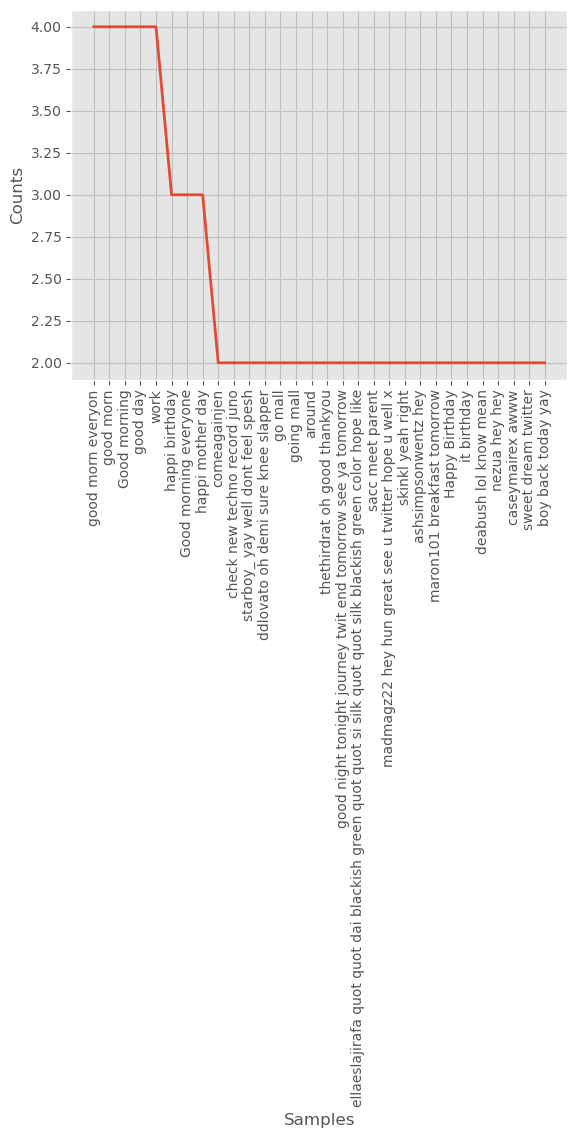

<Axes: xlabel='Samples', ylabel='Counts'>

In [40]:
pos_freqdist.plot(30)

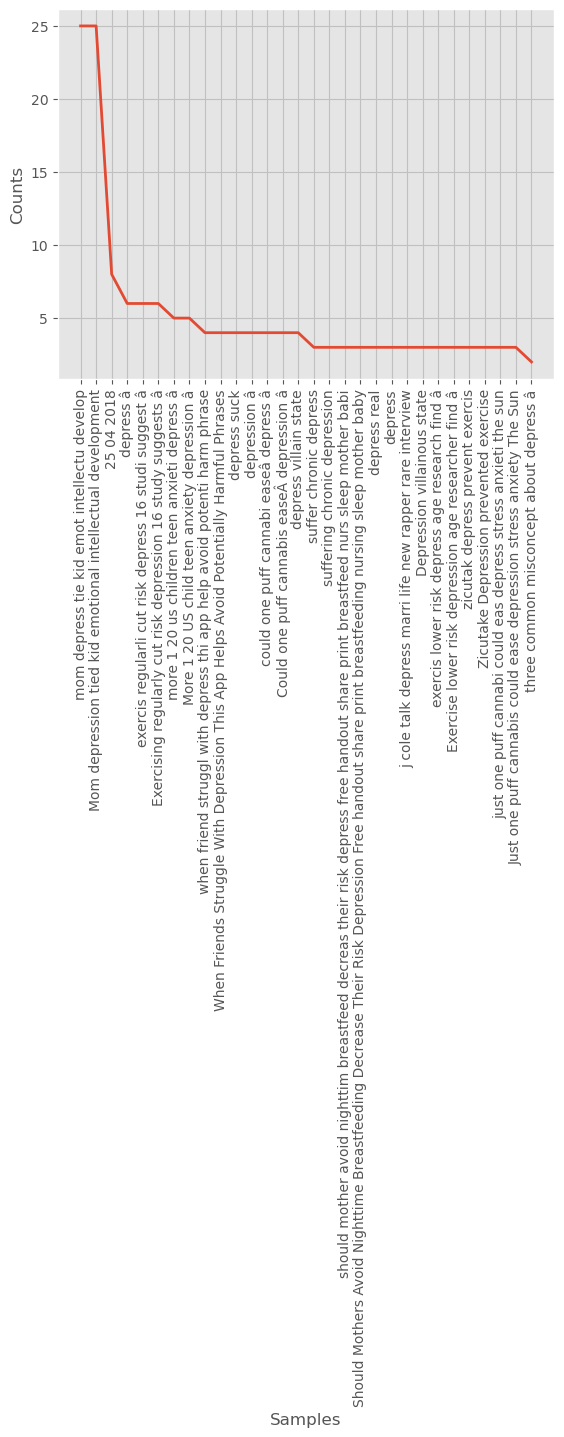

<Axes: xlabel='Samples', ylabel='Counts'>

In [41]:
neg_freqdist.plot(30)